In [1]:
import scipy

In [2]:
import matplotlib.pyplot as plt#pip install -U Pillow

In [3]:
import scipy.io

In [4]:
mat = scipy.io.loadmat('dados_fft.mat')

In [5]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, written by Octave 4.4.1, 2022-06-09 13:07:53 UTC',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[ 0.00000000e+00,  1.85257679e+00,  2.62109978e+00, ...,
         -2.62109978e+00, -1.85257679e+00, -3.17054824e-13]]),
 'y': array([[-1.05303939,  1.91722584,  1.84319166, ..., -4.73210713,
         -3.13415985,  1.23351082]])}

In [6]:
datax = mat.get('x')

In [7]:
datay = mat.get('y')

In [8]:
print(datax)
print(datay)

[[ 0.00000000e+00  1.85257679e+00  2.62109978e+00 ... -2.62109978e+00
  -1.85257679e+00 -3.17054824e-13]]
[[-1.05303939  1.91722584  1.84319166 ... -4.73210713 -3.13415985
   1.23351082]]


In [9]:
import numpy as np

In [10]:
datax = np.array(datax)
datay = np.array(datay)

In [11]:
print(datax[0])
print(datay[0])

[ 0.00000000e+00  1.85257679e+00  2.62109978e+00 ... -2.62109978e+00
 -1.85257679e+00 -3.17054824e-13]
[-1.05303939  1.91722584  1.84319166 ... -4.73210713 -3.13415985
  1.23351082]


Text(0.5, 1.0, 'Sinal X')

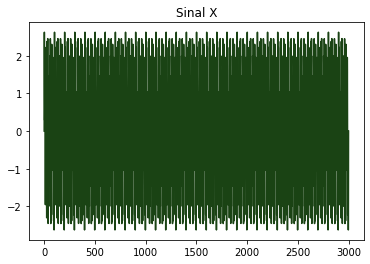

In [12]:
plt.plot(datax[0], color = '#1A4314')
plt.title('Sinal X')

Text(0.5, 1.0, 'Sinal Y')

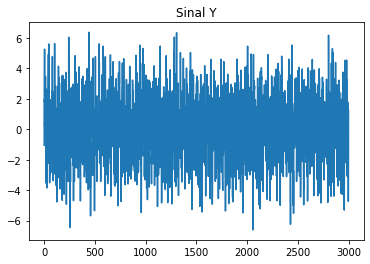

In [13]:
plt.plot(datay[0])
plt.title("Sinal Y")

In [14]:
from scipy.fft import fft, fftfreq

In [55]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies) + 1
    return x, y

In [56]:
x, y = generate_sine_wave(10, 1000, 3)

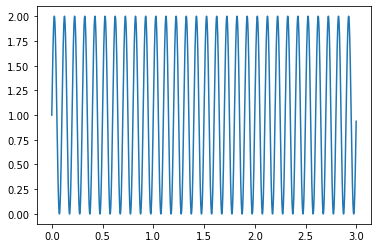

In [57]:
plt.plot(x,y)

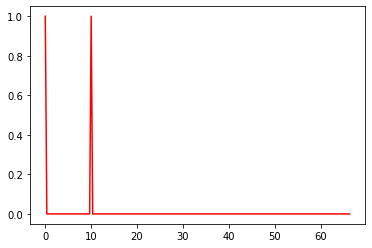

In [60]:
#Sinal X
Fs = 1000
N = (Fs * 3)  #Numero de amostras

yf1 = 2*fft(y)/N
xf1 = fftfreq(N, 1/Fs)
yf1[0] = yf1[0]/2

plt.plot(xf1[0:200], np.abs(yf1)[0:200], 'r')

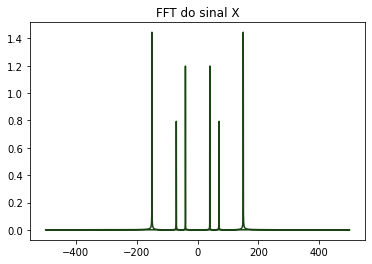

In [19]:
#Sinal X
Fs = 1000
N = (Fs * 3) + 1  #Numero de amostras

yf1 = fft(datax[0])/N #Normaliza
xf1 = fftfreq(N, 1/Fs)

plt.title("FFT do sinal X")
plt.plot(xf1, 2*np.abs(yf1), color = '#1A4314')

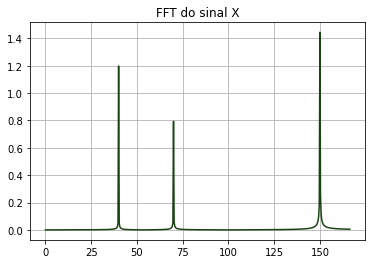

In [20]:
plt.title("FFT do sinal X")
plt.plot(xf1[0:500], 2*np.abs(yf1[0:500]), color = '#1A4314')
plt.grid()

In [21]:
freqs = []
amps = []
for i in range(0,501):
    if(2*abs(yf1[i]) > 0.5):
        freqs.append(xf1[i])
        amps.append(2*abs(yf1[i]))

In [22]:
freqs

[39.98667110963013, 69.97667444185272, 149.95001666111298]

In [23]:
amps

[1.1973547085131606, 0.7933060714831651, 1.4442537062534233]

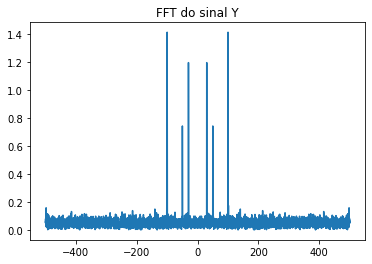

In [24]:
#Sinal Y
Fs = 1000
N = (Fs * 3) + 1  #Numero de amostras

yf2 = fft(datay[0])/N
xf2 = fftfreq(N, 1/Fs)

plt.title("FFT do sinal Y")
plt.plot(xf2, 2*np.abs(yf2))

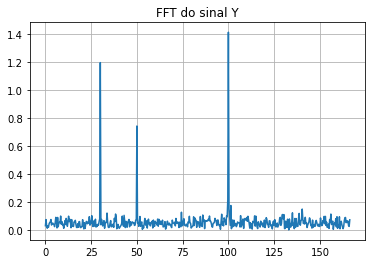

In [25]:
plt.title("FFT do sinal Y")
plt.grid()
plt.plot(xf2[0:500], 2*np.abs(yf2[0:500]))

In [26]:
freqs2 = []
amps2 = []
for i in range(0,501):
    if(2*abs(yf2[i]) > 0.5):
        freqs2.append(xf2[i])
        amps2.append(2*abs(yf2[i]))

In [27]:
freqs2

[29.990003332222596, 49.98333888703766, 99.96667777407532]

In [28]:
amps2

[1.1963052738127313, 0.743507592399777, 1.4131200443440317]

Questao 2

In [29]:
import math

In [30]:
tsig = np.arange(0, 12, 0.1)

In [31]:
from math import pi, cos

sig = []
for t in tsig:
    sinal = 1 - (8/pi**2) * (cos((pi*t)/2) + (1/9)*cos((3*pi*t)/2) + (1/25)*cos((5*pi*t)/2) + (1/49)*cos((7*pi*t)/2) + (1/81)*cos((9*pi*t)/2))
    sig.append(sinal)

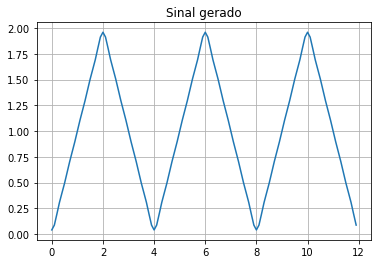

In [32]:
plt.title("Sinal gerado")
plt.grid()
plt.plot(tsig, sig)

In [33]:
import sympy as sym

In [34]:
t1 = sym.symbols('t')

In [35]:
x1 = sym.Piecewise((-t1-2, ((t1>=-2)&(t1<=-1))),
                  (t1,((t1>=-1)&(t1<=1))),
                  (-t1+2, ((t1>=1)&(t1<=2)))
                  )
ser1 = sym.fourier_series(x1, (t1, -2, 2))

In [49]:
ser1.truncate(10)

8*sin(pi*t/2)/pi**2 - 8*sin(3*pi*t/2)/(9*pi**2) + 8*sin(5*pi*t/2)/(25*pi**2) - 8*sin(7*pi*t/2)/(49*pi**2) + 8*sin(9*pi*t/2)/(81*pi**2) - 8*sin(11*pi*t/2)/(121*pi**2) + 8*sin(13*pi*t/2)/(169*pi**2) - 8*sin(15*pi*t/2)/(225*pi**2) + 8*sin(17*pi*t/2)/(289*pi**2) - 8*sin(19*pi*t/2)/(361*pi**2)

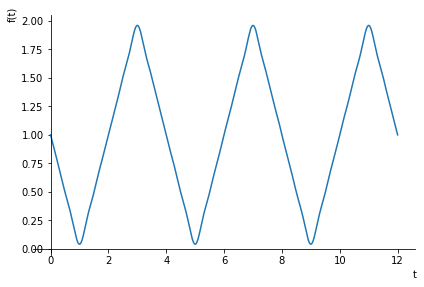

In [37]:
sym.plot(1 - ser1.truncate(5), (t1, 0, 12))

Questao 3

In [38]:
from scipy import signal

In [39]:
Nsamp = 2000
Fsamp = 100

In [40]:
t = np.arange(0, Nsamp/Fsamp, 1/Fsamp)

In [41]:
sig = 2.5*signal.square(2 * np.pi * 1 * t) + 2.5

Text(0.5, 1.0, 'Sinal quadrado')

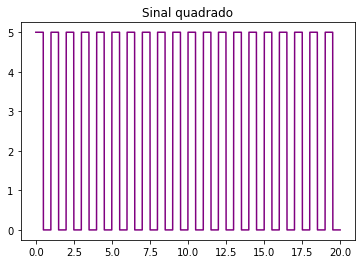

In [42]:
plt.plot(t, sig, color = 'purple')
plt.title("Sinal quadrado")

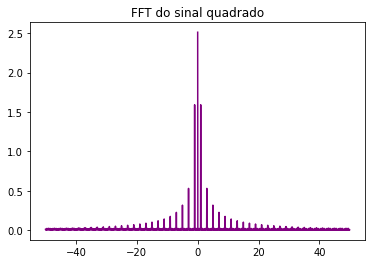

In [50]:
yf3 = fft(sig)/Nsamp
xf3 = fftfreq(Nsamp, 1/Fsamp)

plt.title("FFT do sinal quadrado")
plt.plot(xf3, np.abs(yf3), color = 'purple')

In [44]:
xf3.shape

(2000,)

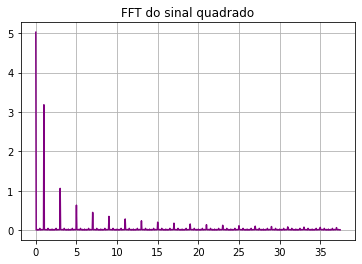

In [45]:
plt.title("FFT do sinal quadrado")
plt.grid()
plt.plot(xf3[0:750], 2*np.abs(yf3[0:750]), color = 'purple')

In [46]:
freqs3 = []
amps3 = []
for i in range(0,751):
    if(2*abs(yf3[i]) > 0.2):
        freqs3.append(xf3[i])
        amps3.append(2*abs(yf3[i]))

In [47]:
freqs3

[0.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0]

In [48]:
amps3

[5.025,
 3.1823697704138385,
 1.0588461610711106,
 0.6329767625202477,
 0.449631792714014,
 0.34713137885101386,
 0.28138229928187464,
 0.23542707632799514,
 0.20135391717866288]